In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import shap
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
data = load_iris()
X = data['data']
y = data['target']
feature_names = data['feature_names']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

SHAP summary plot for class 0 (setosa):


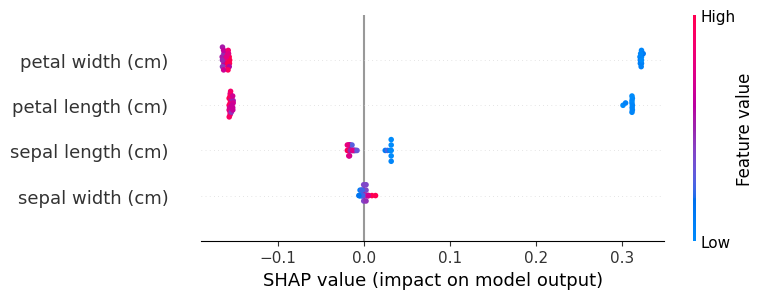

SHAP summary plot for class 1 (versicolor):


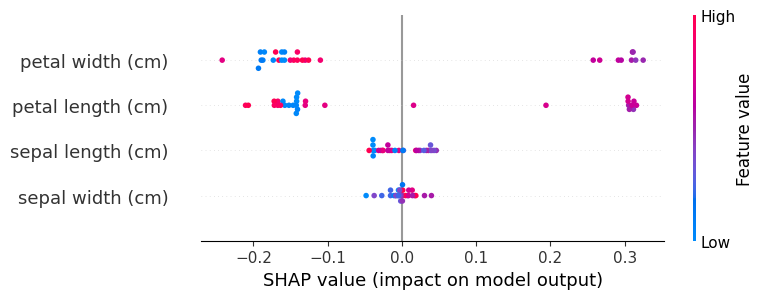

SHAP summary plot for class 2 (virginica):


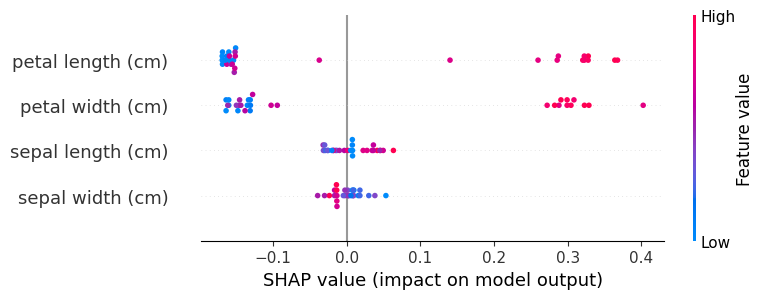

In [32]:
# Create SHAP explainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values for each class
for i in range(len(set(y))):  # Assuming 3 classes as per the shape of shap_values
    print(f"SHAP summary plot for class {i} ({data['target_names'][i]}):")
    shap.summary_plot(shap_values[:,:,i], X_test, feature_names=feature_names)

In [14]:
def get_weights(n):
    # Generating a random skewed distribution
    # np.random.seed(42)  # For reproducibility
    values = np.random.gamma(shape=2.0, scale=2.0, size=n)  # Gamma distribution is typically skewed

    # Normalizing to create a valid probability distribution (weights must sum to 1)
    weights = values / values.sum()

    return weights

In [26]:
X_baseline = X_train

In [27]:
weights = get_weights(X_baseline.shape[0])

In [44]:
n, m = X_test.shape[0], X_baseline.shape[0]
# Creating a random matrix
joint_probs = np.random.rand(n, m)

# Normalizing the entire matrix so that all elements sum to 1
joint_probs /= joint_probs.sum()

SHAP summary plot for class 0 (setosa):


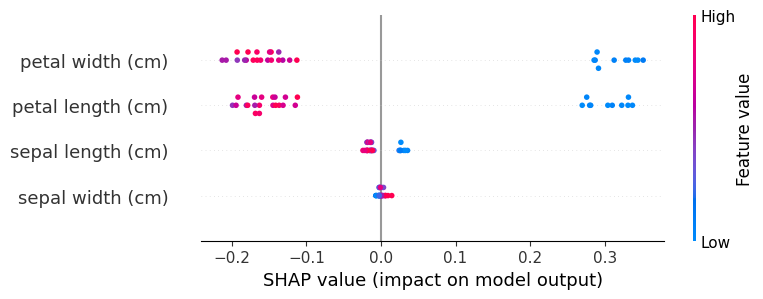

SHAP summary plot for class 1 (versicolor):


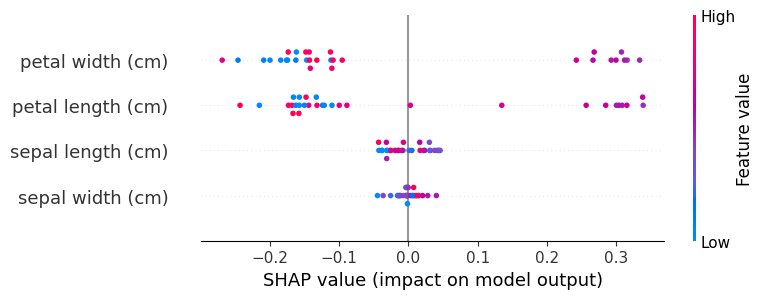

SHAP summary plot for class 2 (virginica):


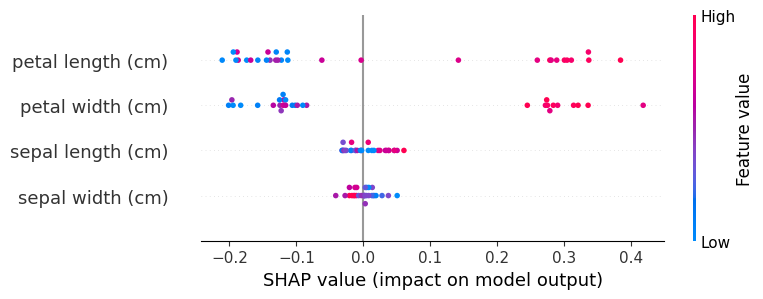

In [58]:
from src import pshap

jp_explainer = pshap.JointProbabilityExplainer(model)

shap_values = jp_explainer.shap_values(X_test, X_baseline, joint_probs)

# Visualize SHAP values for each class
for i in range(len(set(y))):  # Assuming 3 classes as per the shape of shap_values
    print(f"SHAP summary plot for class {i} ({data['target_names'][i]}):")
    shap.summary_plot(shap_values[:,:,i], X_test, feature_names=feature_names)